In [115]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from string import punctuation
import pronouncing
from sklearn import metrics
from scipy.spatial.distance import cdist
nlp = spacy.load('en')
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
text = "april is the cruelest month breeding lilacs out of the dead"

def rhymes(text):
    count = Counter()
    words = text.split()
    for word in words:
        pronunciation_list = pronouncing.phones_for_word(word)
        if len(pronunciation_list) > 0:
            count.update(pronunciation_list[0].split(" "))
    return len({k:v for (k,v) in count.items() if v > 1})
rhymes(text)

9

In [27]:
punctuation_symbols = []
for each in list(punctuation):
    punctuation_symbols.append((each, ''))

In [28]:
def remove_puncuation(x):
    for each in punctuation_symbols:
        x = x.replace(*each)
        x = x.lower()
    return x

In [44]:
file_names = open('PoemList.txt', 'r')
file_names = file_names.readlines()
file_names = [file[:-1] for file in file_names]
author_poem = [file[:-4] for file in file_names]
poem_titles = [re.sub(r'.*_', '', article) for article in author_poem]
poets = [re.sub(r'_.*', '', article) for article in author_poem]

poems = []
word_count = []
line_count = []
num_of_sents = []
processed_poems = []
max_sent_length = []
min_sent_length = []
no_punct_poems = []
processed_no_punct = []
num_of_rhymes = []
for text in file_names:
    # open the text, take out returns 
    opened = open(text, 'r').read()
    poem = opened.replace("\n"," ")
    poem = poem.replace('-', ' ')
    poems.append(poem)
    
    sentences = re.split(r'[.!?]', poem)
    if '' in sentences: 
        sentences.remove('')
    num_of_sents.append(len(sentences))
    
    no_punct = remove_puncuation(poem)
    no_punct_poems.append(no_punct)
    
    rhyme_count = rhymes(no_punct)
    num_of_rhymes.append(rhyme_count)
    
    wordcount = Counter(no_punct.split())
    wordcount = sum(wordcount.values())
    word_count.append(wordcount)
    
    no_punct = nlp(no_punct)
    processed_no_punct.append(no_punct)
    
    num_lines = sum(1 for line in open(text))
    line_count.append(num_lines)
    
#     sentence_length = [len(sent) for sent in sentences]
#     max_sent_length.append(max(sentence_length))
#     min_sent_length.append(min(sentence_length))
    
    sentences = nlp(poem)
    processed_poems.append(sentences)
    
poems_df = pd.DataFrame()
poems_df['poem'] = poems
poems_df["poem_titles"] = poem_titles
poems_df['authors'] = poets
poems_df['word_count'] = word_count
poems_df['line_count'] = line_count
poems_df['num_of_sents'] = num_of_sents
poems_df['processed_poems'] = processed_poems
# poems_df['max_sent_length'] = max_sent_length
# poems_df['min_sent_length'] = min_sent_length
poems_df['no_punct_cap_poems'] = no_punct_poems
poems_df['processed_no_punct'] = processed_no_punct
poems_df['rhyme_count'] = num_of_rhymes

poems_df.head()

,poem,poem_titles,authors,word_count,line_count,num_of_sents,processed_poems,no_punct_cap_poems,processed_no_punct,rhyme_count
0,"Lying, thinking Last night How to find my soul...",Alone,Angelou,162,42,7,"(Lying, ,, thinking, Last, night, How, to, fin...",lying thinking last night how to find my soul ...,"(lying, thinking, last, night, how, to, find, ...",38
1,Curtains forcing their will against the win...,AwakingInNewYork,Angelou,38,11,3,"(Curtains, forcing, their, will, , against,...",curtains forcing their will against the win...,"(curtains, forcing, their, will, , against,...",27
2,A free bird leaps on the back of the wind ...,CagedBird,Angelou,193,43,6,"(A, free, bird, leaps, , on, the, back, of, t...",a free bird leaps on the back of the wind ...,"(a, free, bird, leaps, , on, the, back, of, t...",35
3,"The eye follows, the land Slips upward, creas...",CaliforniaProdigal,Angelou,130,35,8,"(The, eye, follows, ,, the, land, , Slips, up...",the eye follows the land slips upward creases...,"(the, eye, follows, the, land, , slips, upwar...",39
4,"One foot down, then hop! It's hot. Good things...",HarlemHopscotch,Angelou,90,17,14,"(One, foot, down, ,, then, hop, !, It, 's, hot...",one foot down then hop its hot good things for...,"(one, foot, down, then, hop, its, hot, good, t...",38


In [45]:
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)
poems_df = poems_df.sample(frac=1)

In [46]:
poems_df.describe()

,word_count,line_count,num_of_sents,rhyme_count
count,140.000000,140.000000,140.000000,140.000000
mean,147.192857,25.657143,7.485714,35.278571
std,135.219401,23.496754,7.850662,6.459690
min,16.000000,2.000000,1.000000,14.000000
25%,67.500000,14.000000,2.000000,32.000000
50%,113.000000,17.000000,5.000000,37.000000
75%,159.000000,29.000000,10.000000,39.000000
max,814.000000,140.000000,43.000000,48.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113b7f4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ead1c18>]], dtype=object)

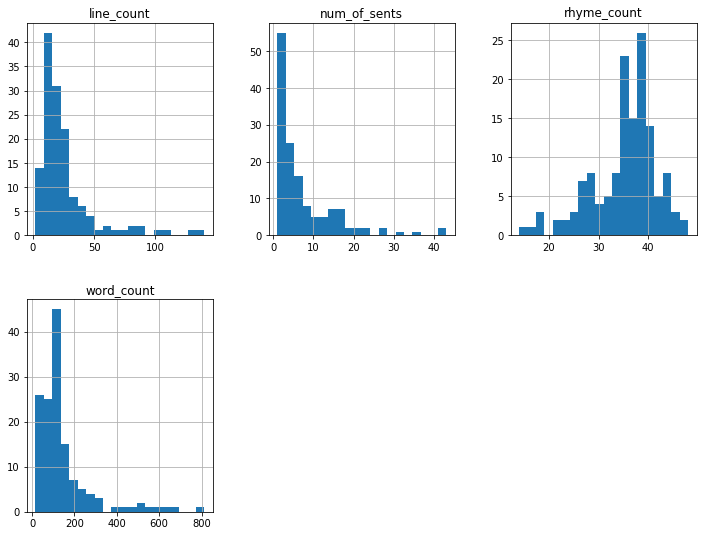

In [47]:
poems_df.hist(bins=20, figsize=(12,9), layout=(2,3))

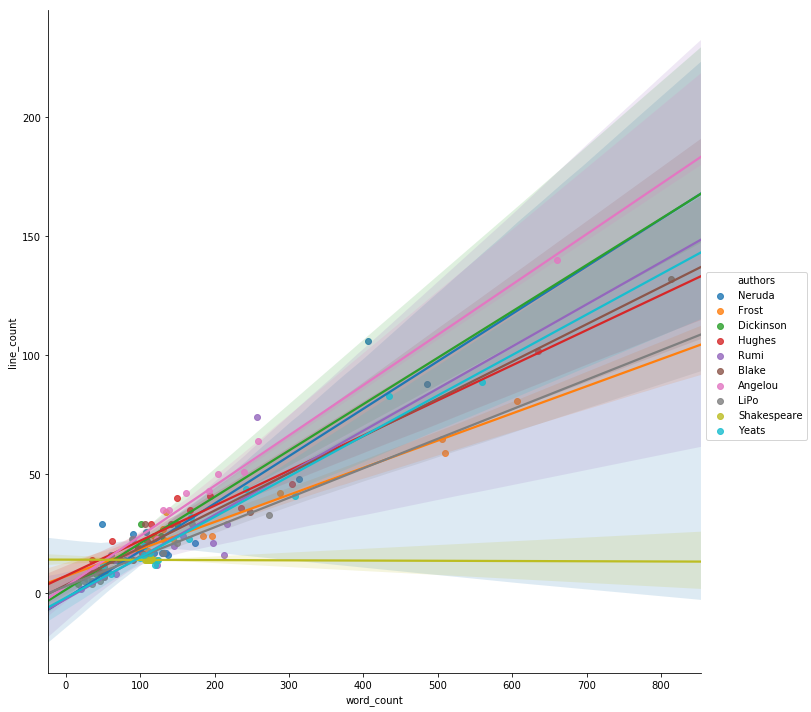

In [48]:
sns.lmplot(x="word_count", y="line_count", hue="authors", size=10, data=poems_df)
plt.show()

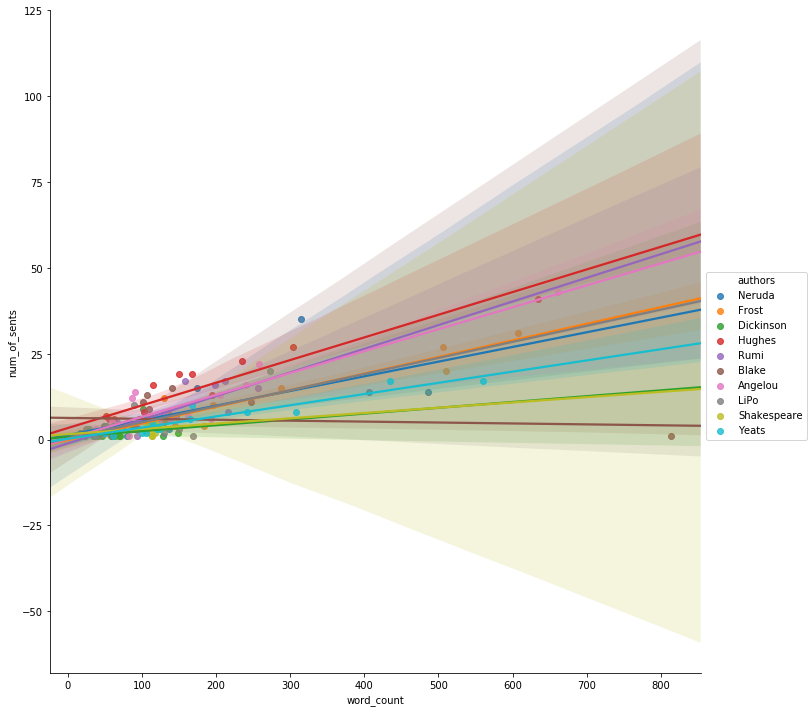

In [49]:
sns.lmplot(x="word_count", y="num_of_sents", hue="authors", size = 10, data=poems_df)
plt.show()

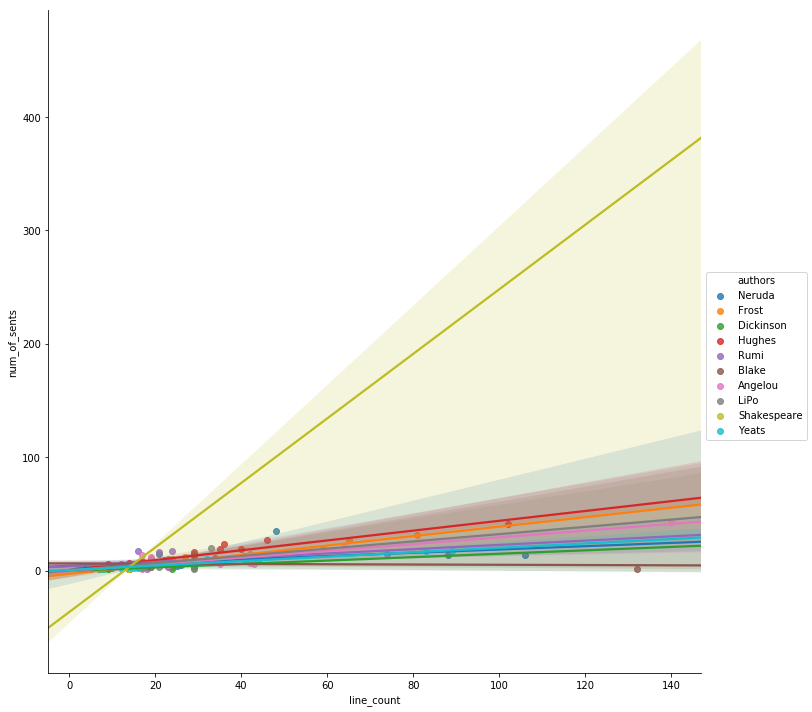

In [50]:
sns.lmplot(x="line_count", y="num_of_sents", hue="authors", size= 10, data=poems_df)
plt.show()

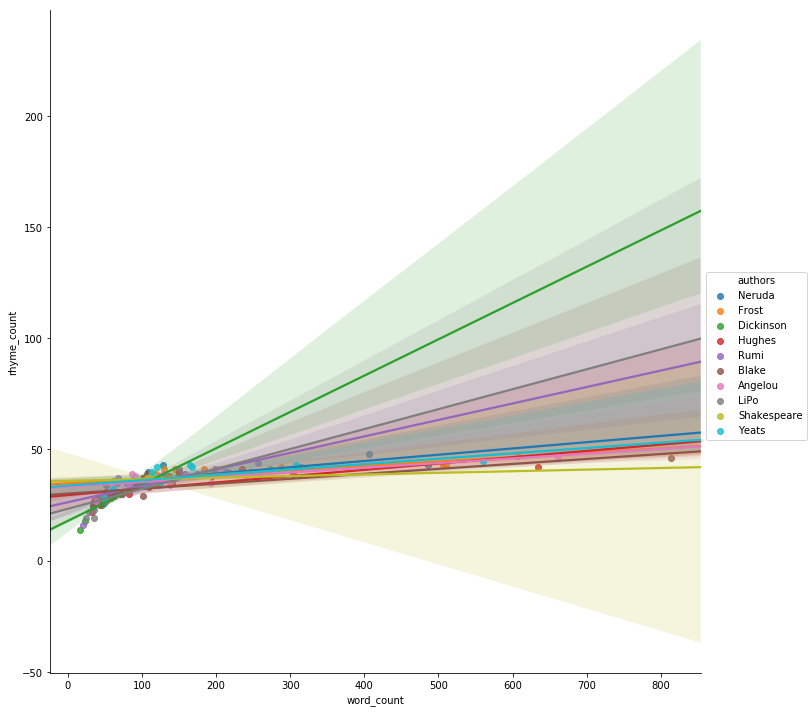

In [51]:
sns.lmplot(x="word_count", y="rhyme_count", hue="authors", size= 10, data=poems_df)
plt.show()

### Do cluster with original non-pca'd features... also use the percentage of variance retained function to see how much variance was kept using pca...

In [52]:
poems_df.columns

Index(['poem', 'poem_titles', 'authors', 'word_count', 'line_count',
       'num_of_sents', 'processed_poems', 'no_punct_cap_poems',
       'processed_no_punct', 'rhyme_count'],
      dtype='object')

              word_count  line_count  num_of_sents  rhyme_count
word_count      1.000000    0.929102      0.708945     0.669578
line_count      0.929102    1.000000      0.697070     0.616958
num_of_sents    0.708945    0.697070      1.000000     0.532560
rhyme_count     0.669578    0.616958      0.532560     1.000000


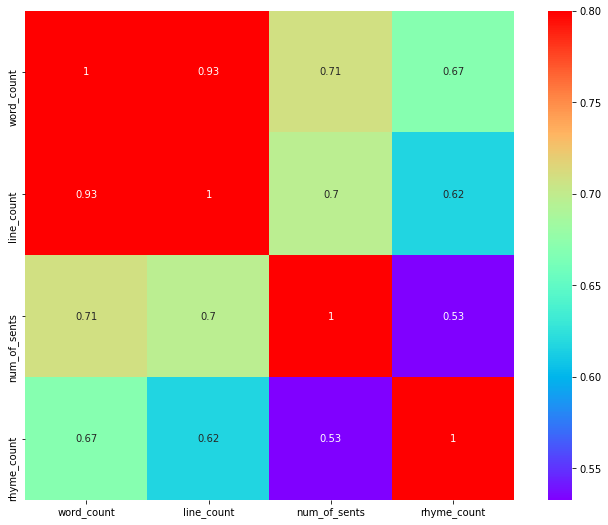

In [53]:
X = poems_df.drop(['poem_titles', 'authors','poem','processed_poems',
       'no_punct_cap_poems', 'processed_no_punct'], axis = 1)

# Make the correlation matrix.
corrmat = X.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap = 'rainbow')
plt.show()

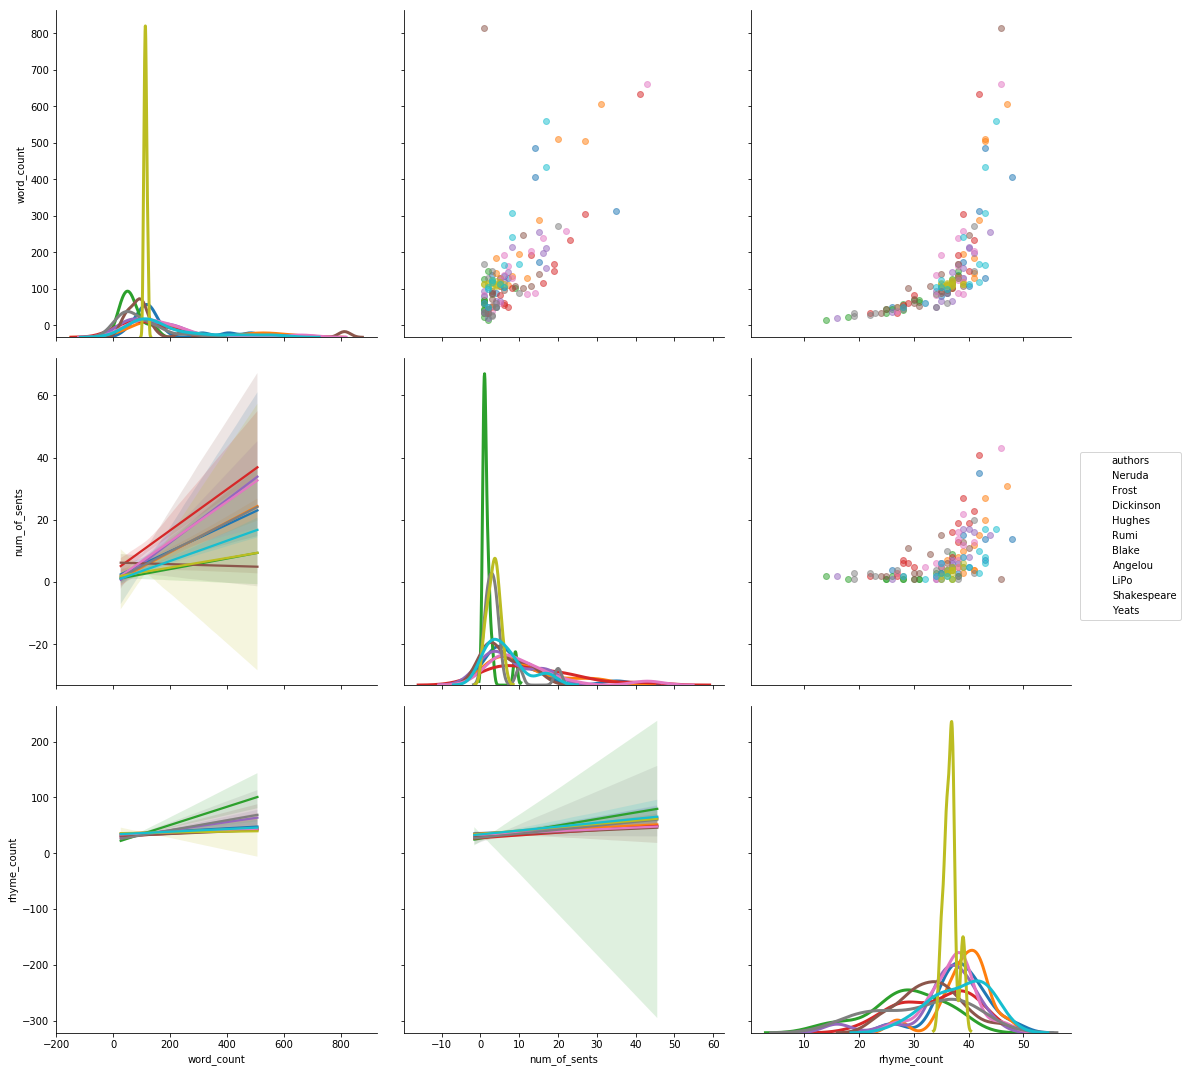

In [54]:
X = poems_df.drop(['poem_titles','poem','processed_poems',
       'no_punct_cap_poems', 'processed_no_punct','line_count'], axis = 1)


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(X.dropna(), hue='authors', size= 5, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()
plt.show()

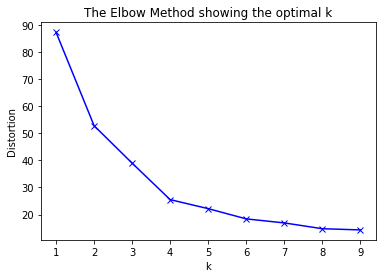

In [55]:
# clustering dataset
# determine k using elbow method

# X = poems_df.drop(['poem_titles', 'authors','poem','processed_poems',
#        'no_punct_cap_poems', 'processed_no_punct'], axis = 1)

# k means determine k
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [56]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_norm = normalize(X)

pca = PCA(n_components = None)
# Reduce it to two components.
X_pca = pca.fit_transform(X_norm)

explained_variance = pca.explained_variance_ratio_

explained_variance

array([ 0.95400965,  0.03820613,  0.00778423])

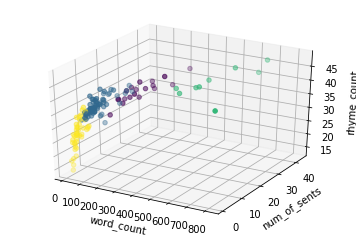

In [57]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['word_count'], X['num_of_sents'], X['rhyme_count'], c=y_pred)

ax.set_xlabel('word_count')
ax.set_ylabel('num_of_sents')
ax.set_zlabel('rhyme_count')

plt.show()

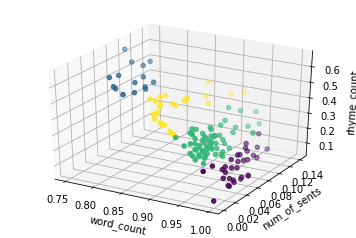

In [58]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_norm = normalize(X)

y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_norm)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_norm[:, [0]], X_norm[:, [1]], X_norm[:,[2]], c=y_pred)

ax.set_xlabel('word_count')
ax.set_ylabel('num_of_sents')
ax.set_zlabel('rhyme_count')

plt.show()

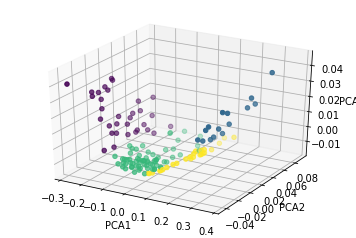

In [59]:
X = poems_df.loc[:,['word_count', 'num_of_sents','rhyme_count']]

X_norm = normalize(X)

pca = PCA(n_components = 3)
# Reduce it to two components.
X_pca = pca.fit_transform(X_norm)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=y_pred)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

In [60]:
cluster_df = poems_df.copy()
cluster_df['cluster'] = y_pred

In [61]:
for i in range(cluster_df['cluster'].nunique()):
    cluster = cluster_df[cluster_df['cluster']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['authors'])),'\n')

Cluster  0 
 Counter({'Frost': 6, 'Hughes': 5, 'Angelou': 5, 'Rumi': 4, 'Yeats': 4, 'Neruda': 4, 'Blake': 2, 'LiPo': 2}) 

Cluster  1 
 Counter({'LiPo': 4, 'Dickinson': 4, 'Rumi': 3, 'Hughes': 2, 'Blake': 1, 'Angelou': 1}) 

Cluster  2 
 Counter({'Shakespeare': 14, 'Blake': 8, 'Neruda': 8, 'Yeats': 8, 'Frost': 7, 'Rumi': 5, 'Angelou': 5, 'Hughes': 4, 'Dickinson': 4, 'LiPo': 4}) 

Cluster  3 
 Counter({'Dickinson': 6, 'LiPo': 4, 'Blake': 3, 'Hughes': 3, 'Angelou': 3, 'Rumi': 2, 'Neruda': 2, 'Yeats': 2, 'Frost': 1}) 



In [62]:
cluster0 = cluster_df.loc[cluster_df['cluster']== 0, ['no_punct_cap_poems','authors']]
for i in cluster0.index:
    print(cluster0.loc[i,'no_punct_cap_poems'], '\n')

tonight i can write the saddest lines   write for examplethe night is shattered  and the blue stars shiver in the distance   the night wind revolves in the sky and sings   tonight i can write the saddest lines  i loved her and sometimes she loved me too   through nights like this one i held her in my arms  i kissed her again and again under the endless sky   she loved me sometimes and i loved her too  how could one not have loved her great still eyes   tonight i can write the saddest lines  to think that i do not have her to feel that i have lost her   to hear the immense night still more immense without her  and the verse falls to the soul like dew to the pasture   what does it matter that my love could not keep her  the night is shattered and she is not with me   this is all in the distance someone is singing in the distance  my soul is not satisfied that it has lost her   my sight searches for her as though to go to her  my heart looks for her and she is not with me   the same night

In [63]:
cluster_df.loc[cluster_df['cluster']== 0, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,32.000000,32.000000,32.000000
mean,334.187500,17.093750,41.375000
std,173.433531,10.237059,2.970283
min,167.000000,1.000000,35.000000
25%,203.250000,10.750000,39.000000
50%,257.500000,15.500000,41.000000
75%,447.750000,20.500000,43.000000
max,814.000000,43.000000,48.000000


In [64]:
cluster_df.loc[cluster_df['cluster']== 1, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,15.000000,15.000000,15.000000
mean,33.400000,2.066667,23.933333
std,9.969955,0.883715,5.812138
min,16.000000,1.000000,14.000000
25%,27.000000,1.500000,20.500000
50%,34.000000,2.000000,24.000000
75%,37.000000,2.500000,27.000000
max,51.000000,4.000000,34.000000


In [65]:
cluster_df.loc[cluster_df['cluster']== 2, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,67.000000,67.000000,67.000000
mean,117.641791,5.611940,36.940299
std,20.846991,3.911735,2.757253
min,73.000000,1.000000,29.000000
25%,105.000000,3.000000,35.000000
50%,114.000000,5.000000,37.000000
75%,130.000000,7.000000,38.500000
max,168.000000,19.000000,43.000000


In [66]:
cluster_df.loc[cluster_df['cluster']== 3, ['word_count', 'num_of_sents','rhyme_count']].describe()

,word_count,num_of_sents,rhyme_count
count,26.000000,26.000000,26.000000
mean,58.846154,3.615385,30.038462
std,13.217238,3.335589,4.617192
min,35.000000,1.000000,19.000000
25%,50.250000,1.000000,27.250000
50%,59.000000,2.500000,29.500000
75%,65.250000,4.750000,32.000000
max,90.000000,14.000000,39.000000


In [67]:
cluster2 = cluster_df.loc[cluster_df['cluster']== 2, ['processed_poems','authors']]
for i in cluster2.index:
    print(cluster2.loc[i,'processed_poems'], '\n')

My Sorrow, when she's here with me, Thinks these dark days of autumn rain Are beautiful as days can be; She loves the bare, the withered tree; She walks the sodden pasture lane.  Her pleasure will not let me stay. She talks and I am fain to list: She's glad the birds are gone away, She's glad her simple worsted grey Is silver now with clinging mist.  The desolate, deserted trees, The faded earth, the heavy sky, The beauties she so truly sees, She thinks I have no eye for these, And vexes me for reason why.  Not yesterday I learned to know The love of bare November days Before the coming of the snow, But it were vain to tell her so, And they are better for her praise. 

Two roads diverged in a yellow wood, And sorry I could not travel both And be one traveler, long I stood And looked down one as far as I could To where it bent in the undergrowth;   Then took the other, as just as fair, And having perhaps the better claim Because it was grassy and wanted wear, Though as for that the pass

In [68]:
cluster1 = cluster_df.loc[cluster_df['cluster']== 1, ['processed_poems','authors']]
for i in cluster1.index:
    print(cluster1.loc[i,'processed_poems'], '\n')

“Faith” is a fine invention For Gentlemen who see! But Microscopes are prudent In an Emergency! 

Hold fast to dreams  For if dreams die Life is a broken winged bird That cannot fly.  Hold fast to dreams For when dreams go Life is a barren field Frozen with snow. 

The moon shimmers in green water.  White herons fly through the moonlight.  The young man hears a girl gathering water chestnuts: into the night, singing, they paddle home together. 

I sat srinking and did not notice the dusk, Till falling petals filled the folds of my dress.  Drunken I rose and walked to the moonlit stream; The birds were gone, and men also few. 

We are the flute, our music is all Thine; We are the mountains echoing only Thee; And movest to defeat or victory; Lions emblazoned high on flags unfurled  They wind invisible sweeps us through the world. 

The Bustle in a House The Morning after Death Is solemnest of industries Enacted upon Earth  The Sweeping up the Heart And putting Love away We shall not want

In [69]:
cluster3 = cluster_df.loc[cluster_df['cluster']== 3, ['processed_poems','authors']]
for i in cluster3.index:
    print(cluster3.loc[i,'processed_poems'], '\n')

You ask me why I dwell in the green mountain;  I smile and make no reply for my heart is free of care.   As the peach blossom flows down stream and is gone into the unknown,  I have a world apart that is not among men. 

There was wine in a cup of gold and a girl of fifteen from Wu, her eyebrows painted dark and with slippers of red brocade.   If her conversation was poor, how beautifully she could sing! Together we dined and drank until she settled in my arms.   Behind her curtains embroidered with lotuses, how could I refuse the temptation of her advances? 

“Hope” is the thing with feathers   That perches in the soul   And sings the tune without the words   And never stops   at all    And sweetest   in the Gale   is heard   And sore must be the storm   That could abash the little Bird That kept so many warm    I’ve heard it in the chillest land   And on the strangest Sea   Yet   never   in Extremity, It asked a crumb   of me. 

My man is Black Golden Amber Changing. Warm mouths of B

### Make sure to do a confusion matrix!!! Experiment with different clusters. Elbow graph!

In [70]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 4


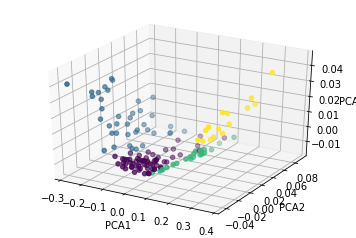

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=labels)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

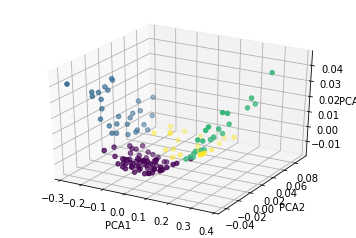

In [72]:
# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:,2], c=predict)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

In [73]:
cluster_df3 = poems_df.copy()
cluster_df3['clusters'] = predict

### Here is the bag of words analysis starts...

In [74]:
poems_df.columns

Index(['poem', 'poem_titles', 'authors', 'word_count', 'line_count',
       'num_of_sents', 'processed_poems', 'no_punct_cap_poems',
       'processed_no_punct', 'rhyme_count'],
      dtype='object')

### First I will use the bag of words analysis on a poem level. As you can see, the results were not that great with the test sets. With only 140 poems available, I am pretty certain it is because there are not very many samples for the models to work with.

In [75]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    return allwords

In [76]:
set_bag = []

for i, poem in enumerate(poems_df['processed_no_punct']):
    allwords = bag_of_words(poem)
    set_bag.extend(allwords)
    
set_bag = set(set_bag)

In [77]:
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['processed_no_punct'] = sentences['processed_no_punct']
    df['authors'] = sentences['authors']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['processed_no_punct']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [78]:
bow_df = bow_features(poems_df, set_bag)

Processing row 0


In [79]:
bow_df.shape

(140, 3049)

In [80]:
Y = bow_df['authors']
X = np.array(bow_df.drop(['processed_no_punct','authors'], 1))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [81]:
rfc = ensemble.RandomForestClassifier()

rfc.fit(X_train, Y_train)

print('Training set score:', rfc.score(X_train, Y_train))
print('Training set score:', rfc.score(X_test, Y_test))

Training set score: 0.971428571429
Training set score: 0.0857142857143


In [82]:
lr = LogisticRegression()
train = lr.fit(X_train, Y_train)

print('Training set score:', lr.score(X_train, Y_train))
print('Training set score:', lr.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0857142857143


In [83]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, Y_train)

print('Training set score:', clf.score(X_train, Y_train))
print('Training set score:', clf.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0857142857143


In [84]:
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)

print('Training set score:', svm.score(X_train, Y_train))
print('Training set score:', svm.score(X_test, Y_test))

Training set score: 1.0
Training set score: 0.0571428571429


### Below is a bag of words analysis on a sentence level. Now with almost 778 samples to use, which although performed better still is pretty low...

In [85]:
test = []
for i, poem in enumerate(poems_df['processed_no_punct']):
    poem_sents = [[sent, poems_df.loc[i,'authors']] for sent in poems_df.loc[i,'processed_no_punct'].sents]
    test.extend(poem_sents)

sentences_df = pd.DataFrame(test, columns = ['processed_no_punct','authors'])
sentences_df.head()

,processed_no_punct,authors
0,"(lying, thinking, last, night, how, to, find, ...",Angelou
1,"(i, came, up, with, one, thing, and, i, do, n’...",Angelou
2,"(all, alone, nobody, but, nobody, can, make, i...",Angelou
3,"(but, nobody, no, nobody, can, make, it, out, ...",Angelou
4,"(nobody, but, nobody, can, make, it, out, here...",Angelou


In [86]:
def bow_features2(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['processed_no_punct'] = sentences['processed_no_punct']
    df['authors'] = sentences['authors']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['processed_no_punct']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [87]:
bow_df2 = bow_features2(sentences_df, set_bag)

Processing row 0
Processing row 500


In [88]:
pd.options.display.max_columns = None
bow_df2.head()

grievance verse— lightning immortality       vein dreaming stride spill  \
0         0      0         0           0     0    0        0      0     0   
1         0      0         0           0     0    0        0      0     0   
2         0      0         0           0     0    0        0      0     0   
3         0      0         0           0     0    0        0      0     0   
4         0      0         0           0     0    0        0      0     0   

  sidewalk glass open useless pony raisd stitching boyhood frenzy apache loud  \
0        0     0    0       0    0     0         0       0      0      0    0   
1        0     0    0       0    0     0         0       0      0      0    0   
2        0     0    0       0    0     0         0       0      0      0    0   
3        0     0    0       0    0     0         0       0      0      0    0   
4        0     0    0       0    0     0         0       0      0      0    0   

  king cossack sens globe boot swadl arrow daisy flag wrench past instructor  \
0    0       0    0     0    0     0     0     0    0      0    0          0   
1    0       0    0     0    0     0     0     0    0      0    0          0   
2    0       0    0     0    0     0     0     0    0      0    0          0   
3    0       0    0     0    0     0     0     0    0      0    0          0   
4    0       0    0     0    0     0     0     0    0      0    0          0   

  century add wine coat throne daring die’ move compare nightfall indignant  \
0       0   0    0    0      0      0    0    0       0         0         0   
1       0   0    0    0      0      0    0    0       0         0         0   
2       0   0    0    0      0      0    0    0       0         0         0   
3       0   0    0    0      0      0    0    0       0         0         0   
4       0   0    0    0      0      0    0    0       0         0         0   

  england noisy skylark meadow northern diggin curve  ’ surface step halve  \
0       0     0       0      0        0      0     0  0       0    0     0   
1       0     0       0      0        0      0     0  0       0    0     0   
2       0     0       0      0        0      0     0  0       0    0     0   
3       0     0       0      0        0      0     0  0       0    0     0   
4       0     0       0      0        0      0     0  0       0    0     0   

  siege reel instant civility rabbit clump close sing brace calld wile  \
0     0    0       0        0      0     0     0    0     0     0    0   
1     0    0       0        0      0     0     0    0     0     0    0   
2     0    0       0        0      0     0     0    1     0     0    0   
3     0    0       0        0      0     0     0    0     0     0    0   
4     0    0       0        0      0     0     0    0     0     0    0   

  undermine unwind emergency irish beast seald weakness gnat decline steer  \
0         0      0         0     0     0     0        0    0       0     0   
1         0      0         0     0     0     0        0    0       0     0   
2         0      0         0     0     0     0        0    0       0     0   
3         0      0         0     0     0     0        0    0       0     0   
4         0      0         0     0     0     0        0    0       0     0   

  motion firm wrap quality feel brake falconer knowest grace spider enigma  \
0      0    0    0       0    0     0        0       0     0      0      0   
1      0    0    0       0    0     0        0       0     0      0      0   
2      0    0    0       0    0     0        0       0     0      0      0   
3      0    0    0       0    0     0        0       0     0      0      0   
4      0    0    0       0    0     0        0       0     0      0      0   

  rely writ withered hollow today angelo butter mr vast heart sweep shut  \
0    0    0        0      0     0      0      0  0    0     0     0    0   
1    0    0        0      0     0      0      0  0    0     0     0    0   
2    0    0     

In [89]:
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)
bow_df2 = bow_df2.sample(frac=1)

In [90]:
bow_df2.shape

(778, 3049)

In [91]:
Y2 = bow_df2['authors']
X2 = np.array(bow_df2.drop(['processed_no_punct','authors'], 1))

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.20, random_state=42)

In [92]:
rfc2 = ensemble.RandomForestClassifier()

rfc2.fit(X2_train, Y2_train)

print('Training set score:', rfc2.score(X2_train, Y2_train))
print('Test set score:', rfc2.score(X2_test, Y2_test))

Training set score: 0.961414790997
Test set score: 0.320512820513


In [93]:
cross_val_score(rfc2, X2, Y2, cv=5)

array([ 0.35      ,  0.36942675,  0.34615385,  0.34415584,  0.39735099])

In [94]:
lr2 = LogisticRegression()
lr2.fit(X2_train, Y2_train)

print('Training set score:', lr2.score(X2_train, Y2_train))
print('Training set score:', lr2.score(X2_test, Y2_test))

Training set score: 0.945337620579
Training set score: 0.474358974359


In [95]:
cross_val_score(lr2,  X2, Y2, cv=5)

array([ 0.5       ,  0.55414013,  0.44871795,  0.49350649,  0.55629139])

In [96]:
svm2 = SVC(kernel = 'linear')
svm2.fit(X2_train, Y2_train)

print('Training set score:', svm2.score(X2_train, Y2_train))
print('Training set score:', svm2.score(X2_test, Y2_test))

Training set score: 0.969453376206
Training set score: 0.384615384615


In [97]:
cross_val_score(svm2, X2, Y2, cv=5)

array([ 0.4       ,  0.40127389,  0.41025641,  0.42857143,  0.44370861])

### Cluster analysis based off of bag of words...

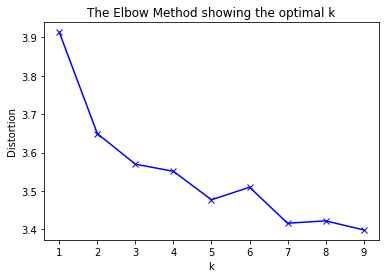

In [98]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X2)
    kmeanModel.fit(X2)
    distortions.append(sum(np.min(cdist(X2, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X2.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [99]:
X2_norm = normalize(X2)

pca = PCA(n_components = None)
# Reduce it to two components.
X_pca = pca.fit_transform(X2_norm)

explained_variance = pca.explained_variance_ratio_

explained_variance[:5]

array([ 0.04424305,  0.02096829,  0.02004892,  0.01931849,  0.01872764])

In [100]:
# Calculate predicted values.
Y2_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X2)

In [101]:
bow_clusters_df = bow_df2.copy()

In [102]:
bow_clusters_df['clusters'] = Y2_pred

In [103]:
for i in range(bow_clusters_df['clusters'].nunique()):
    cluster = bow_clusters_df[bow_clusters_df['clusters']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['authors'])),'\n')

Cluster  0 
 Counter({'Hughes': 121, 'Angelou': 94, 'Neruda': 89, 'Frost': 85, 'Yeats': 65, 'Dickinson': 51, 'Shakespeare': 45, 'Rumi': 43, 'LiPo': 41, 'Blake': 40}) 

Cluster  1 
 Counter({'Angelou': 3, 'Yeats': 3}) 

Cluster  2 
 Counter({'Blake': 16, 'Angelou': 13, 'Yeats': 13, 'Frost': 11, 'Rumi': 10, 'Hughes': 6, 'Neruda': 5, 'LiPo': 5, 'Dickinson': 2, 'Shakespeare': 2}) 

Cluster  3 
 Counter({'Blake': 8, 'Frost': 4, 'Hughes': 1, 'Angelou': 1, 'Dickinson': 1}) 



In [104]:
# This cluster is mostly sentences with i, he, she, we in them

bow_cluster0 = bow_clusters_df.loc[bow_clusters_df['clusters']== 0, ['processed_no_punct','authors']]
for i in bow_cluster0.index:
    print(bow_cluster0.loc[i,'processed_no_punct'], '\n')

he’d found a fish to carry— half fish     

it is in the vision of the physical eyes that no invisible or secret thing exists but when the eye is turned toward the light of god what thing could remain hidden under such a light although all lights emanate from the divine light dont call all these lights the light of god 

i rise up from a past thats rooted in pain 

i became your wife so bashful that i dared not smile 

she came home running         back to the mothering blackness           deep in the smothering blackness  white tears icicle gold plains of her face            

i will send them to her and die’  and when the morning whitened  he left them where she went by    

you know how this is if i look at the crystal moon at the red branch of the slow autumn at my window if i touch near the fire the impalpable ash or the wrinkled body of the log everything carries me to you as if everything that exists aromas light metals were little boats that sail toward those isles of yours tha


she came down creeping    

then took the other as just as fair and having perhaps the better claim because it was grassy and wanted wear though as for that the passing there had worn them really about the same  and both that morning equally lay in leaves no step had trodden black 

i shall stop loving you little by little  if suddenly you forget me do not look for me for i shall already have forgotten you” 

i know it all life and its archipelago the sea and the incalculable city botany the gyneceum and its frenzies 

’s fool 

in the trembling blue green of the sky    a moon worn as if it had been a shell    washed by time’s waters as they rose and fell    about the stars and broke in days and years   i had a thought for no one’s but your ears     

’s waste 

has found out thy bed of crimson joy and his dark secret love does thy life destroy 

it was only her loveliness the king adored but unfortunately jealousy within the palace led to her death 

i went to school there then durha


yet now it seems an idle trade 

“ 

nobody but nobody can make it out here alone  now if you listen closely i’ll tell you what i know storm clouds are gathering the wind is gonna blow the race of man is suffering 

if spoken by the distant bird—  if met in ether sea by frigate or by merchantman—  no notice 

i said me  go ahead on now 

her child     

i’ve known her — from an ample nation 

the birds have vanished down the sky now the last cloud drains away  we sit together the mountain and me until only the mountain remains 

oh you do not run away 

i heard that negro sing that old piano moan—       

but it’s dead now the popes and the preachers’ve made too much money from it 

will you come back 

— unmoved — 

do i ensconce me here within the knowledge of mine own desert and this my hand against myself uprear to guard the lawful reasons on thy part to leave poor me thou hast the strength of laws since why to love i can allege no cause 

the privileged the homeless 

if i should

have wondered    what they see in me  they try so much   

having a wheel and four legs of its own has never availed the cumbersome grindstone to get it anywhere that i can see these hands have helped it go and even race not all the motion though they ever lent not all the miles it may have thought it went have got it one step from the starting place it stands beside the same old apple tree 



In [105]:
# This cluster is mostly sentences with i, he, she, we in them

bow_cluster1 = bow_clusters_df.loc[bow_clusters_df['clusters']== 1, ['processed_no_punct','authors']]
for i in bow_cluster1.index:
    print(bow_cluster1.loc[i,'processed_no_punct'], '\n')

the eye follows the land  slips upward creases down forms    the gentle buttocks of a young    giant in the nestle  old adobe bricks washed of    whiteness paled to umber  await another century   star jasmine and old vines  lay claim upon the ghosted land    then quiet pools whisper    private childhood secrets   flush on inner cottage walls    antiquitous faces  used to the gelid breath  of old manors glare disdainfully    over breached time   around and through these    cold phantasmatalities    he walks insisting  to the languid air  activity music  a generosity of graces   his lupin fields spurn old  deceit and agile poppies 

i have met them at close of day    coming with vivid faces  from counter or desk among grey    eighteenth century houses  i have passed with a nod of the head    or polite meaningless words    or have lingered awhile and said    polite meaningless words  and thought before i had done    of a mocking tale or a gibe    to please a companion  around the fire at 

In [106]:
bow_cluster2 = bow_clusters_df.loc[bow_clusters_df['clusters']== 2, ['processed_no_punct','authors']]
for i in bow_cluster2.index:
    print(bow_cluster2.loc[i,'processed_no_punct'], '\n')

it’s in the arch of my back    the sun of my smile  the ride of my breasts  the grace of my style   

dance  in golden riot   each day is  fulminant exploding brightly    under the gaze of his exquisite    sires frozen in the famed paint    of dead masters audacious    sunlight casts defiance  at their feet 

dont go far off not even for a day because     because    i dont know how to say it a day is long  and i will be waiting for you as in an empty station  when the trains are parked off somewhere else asleep   dont leave me even for an hour because  then the little drops of anguish will all run together  the smoke that roams looking for a home will drift  into me choking my lost heart    

the winners shout the losers curse  dance before dead englands hearse  every night  every morn  some to misery are born  every morn and every night   

some are born to sweet delight  some are born to sweet delight  some are born to endless night  we are led to believe a lie  when we see not thro 

In [107]:
bow_cluster3 = bow_clusters_df.loc[bow_clusters_df['clusters']== 3, ['processed_no_punct','authors']]
for i in bow_cluster3.index:
    print(bow_cluster3.loc[i,'processed_no_punct'], '\n')

never seek to tell thy love  love that never told can be  for the gentle wind does move  silently invisibly  i told my love i told my love  i told her all my heart  trembling cold in ghastly fears ah she doth depart  soon as she was gone from me  a traveller came by  silently invisibly   

the soul unto itself is an imperial friend  –   or the most agonizing spy  –   an enemy  –  could send  –   secure against its own  –   no treason it can fear  –   itself  –  its sovereign  –  of itself the soul should stand in awe  –   

toys  the old mans reasons  are the fruits of the two seasons  the questioner who sits so sly  shall never know how to reply  he who replies to words of doubt  doth put the light of knowledge out  the strongest poison ever known  came from caesars laurel crown  nought can deform the human race  like to the armours iron brace  when gold  gems adorn the plow  to peaceful arts shall envy bow  a riddle or the crickets cry  is to doubt a fit reply  the emmets inch  eagle

In [108]:
bandwidth = estimate_bandwidth(X2, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 6


In [109]:
bow_mean_shift_clusters = bow_df2.copy()

In [110]:
bow_mean_shift_clusters['clusters'] = labels

In [111]:
for i in range(bow_mean_shift_clusters['clusters'].nunique()):
    cluster = bow_mean_shift_clusters[bow_mean_shift_clusters['clusters']== i]
    print('Cluster ', i, '\n', Counter(list(cluster['authors'])),'\n')

Cluster  0 
 Counter({'Hughes': 121, 'Angelou': 104, 'Neruda': 93, 'Frost': 91, 'Yeats': 70, 'Dickinson': 53, 'Rumi': 50, 'Shakespeare': 45, 'Blake': 43, 'LiPo': 43}) 

Cluster  1 
 Counter({'Hughes': 5}) 

Cluster  2 
 Counter({'Yeats': 2, 'Rumi': 1}) 

Cluster  3 
 Counter({'Blake': 7, 'Angelou': 3, 'Frost': 2, 'Hughes': 1, 'Dickinson': 1}) 

Cluster  4 
 Counter({'LiPo': 3}) 

Cluster  5 
 Counter({'Blake': 14, 'Yeats': 9, 'Frost': 7, 'Angelou': 4, 'Rumi': 2, 'Shakespeare': 2, 'Neruda': 1, 'Hughes': 1}) 



In [112]:
mean_shift_cluster1 = bow_mean_shift_clusters.loc[bow_mean_shift_clusters['clusters']== 1, ['processed_no_punct','authors']]
for i in mean_shift_cluster1.index:
    print(mean_shift_cluster1.loc[i,'processed_no_punct'], '\n')

hey boy a bright bowl of brass is beautiful to the lord bright polished brass like the cymbals of king david’s dancers like the wine cups of solomon       hey boy a clean spittoon on the altar of the lord a clean bright spittoon all newly polished— at least i can offer that       com’mere boy 

hey boy       a nickel       a dime       a dollar two dollars a day        

what happens to a dream deferred        does it dry up       like a raisin in the sun       or fester like a sore—       and then run       does it stink like rotten meat       or crust and sugar over—       like a syrupy sweet        maybe it just sags       like a heavy load        or does it explode 

hey boy       a nickel       a dime       a dollar       two dollars buy shoes for the baby house rent to pay gin on saturday church on sunday       my god babies and gin and church and women and sunday all mixed with dimes and dollars and clean spittoons and house rent to pay        

clean the spittoons boy       det

In [113]:
mean_shift_cluster2 = bow_mean_shift_clusters.loc[bow_mean_shift_clusters['clusters']== 2, ['processed_no_punct','authors']]
for i in mean_shift_cluster2.index:
    print(mean_shift_cluster2.loc[i,'processed_no_punct'], '\n')

is the sacrifice  like the birds of the sea men come from the ocean  the ocean of the soul  like the birds of the sea men come from the ocean  the ocean of the soul  how could this bird born from that sea make his dwelling here   

once more the storm is howling and half hid under this cradle hood and coverlid my child sleeps on  there is no obstacle but gregory’s wood and one bare hill whereby the haystack  and roof levelling wind bred on the atlantic can be stayed and for an hour i have walked and prayed because of the great gloom that is in my mind  i have walked and prayed for this young child an hour and heard the sea wind scream upon the tower and under the arches of the bridge and scream in the elms above the flooded stream imagining in excited reverie that the future years had come dancing to a frenzied drum out of the murderous innocence of the sea  may she be granted beauty and yet not beauty to make a stranger’s eye distraught or hers before a looking glass for such being ma

### DF_IDF

In [116]:
corpus = []
for i in range(poems_df.shape[0]):
    corpus.append(poems_df.loc[i,'no_punct_cap_poems'])

In [117]:

vectorizer = TfidfVectorizer(min_df=1)
X = vectorizer.fit_transform(corpus)
idf = vectorizer.idf_
# print(dict(zip(vectorizer.get_feature_names(), idf)))

In [118]:
idf_dict = dict(zip(vectorizer.get_feature_names(), idf))

In [119]:
idf_words = list(idf_dict.keys())

In [120]:
def idf_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['processed_no_punct'] = sentences['processed_no_punct']
    df['authors'] = sentences['authors']
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['processed_no_punct']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += idf_dict[word]
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

In [121]:
dfidf_df = idf_features(poems_df, idf_words)

Processing row 0


In [122]:
dfidf_df.head()

failed bred immortality dreaming while really sidewalk who tyrants tides  \
96       0    0           0        0     0      0        0   0       0     0   
50       0    0           0        0     0      0        0   0       0     0   
29       0    0           0        0     0      0        0   0       0     0   
61       0    0           0        0     0      0        0   0       0     0   
101      0    0           0        0     0      0        0   0       0     0   

    glass buds gelid banished lightning open fans presagers trial useless  \
96      0    0     0        0         0    0    0         0     0       0   
50      0    0     0        0         0    0    0         0     0       0   
29      0    0     0        0         0    0    0         0     0       0   
61      0    0     0        0         0    0    0         0     0       0   
101     0    0     0        0         0    0    0         0     0       0   

    thrusting pony crooned blackning boyhood poured apache loud wrecked gas  \
96          0    0       0         0       0      0      0    0       0   0   
50          0    0       0         0       0      0      0    0       0   0   
29          0    0       0         0       0      0      0    0       0   0   
61          0    0       0         0       0      0      0    0       0   0   
101         0    0       0         0       0      0      0    0       0   0   

    king speech strikes globe twist arrow needed suffered past instructor  \
96     0      0       0     0     0     0      0        0    0          0   
50     0      0       0     0     0     0      0        0    0          0   
29     0      0       0     0     0     0      0        0    0          0   
61     0      0       0     0     0     0      0        0    0          0   
101    0      0       0     0     0     0      0        0    0          0   

    every dimpled century laying soaks coat throne daring neverlessness roams  \
96      0       0       0      0     0    0      0      0             0     0   
50      0       0       0      0     0    0      0      0             0     0   
29      0       0       0      0     0    0      0      0       5.25561     0   
61      0       0       0      0     0    0      0      0             0     0   
101     0       0       0      0     0    0      0      0             0     0   

    countertops helpless spends move resounds compare shatter england noisy  \
96            0        0      0    0        0       0       0       0     0   
50            0        0      0    0        0       0       0       0     0   
29            0        0      0    0        0       0       0       0     0   
61            0        0      0    0        0       0       0       0     0   
101           0        0      0    0        0       0       0       0     0   

    meadow dont northern diggin there calls peasant stroking blesses  \
96       0    0        0      0     0     0       0        0       0   
50       0    0        0      0     0     0       0        0       0   
29       0    0        0      0     0     0       0        0       0   
61       0    0        0      0     0     0       0        0       0   
101      0    0        0      0     0     0       0        0       0   

    therefore step dipped standing filtered siege safely gives model thus  \
96          0    0      0        0        0     0      0     0     0    0   
50          0    0      0        0        0     0      0     0     0    0   
29          0    0      0        0        0     0      0     0     0    0   
61          0    0      0        0        0     0      0     0     0    0   
101         0    0      0        0        0     0      0     0     0    0   

    reel chips instant theres civility at rabbit clump    close sing brace  \
96     0     0       0      0        0  0      0     0  3.75154    0     0   
50     0     0       0      0        0  0      0     0        0    0     0   
29     0     0       0      0 

In [123]:
Y3 = dfidf_df['authors']
X3 = np.array(dfidf_df.drop(['processed_no_punct','authors'], 1))

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.20, random_state=42)

In [124]:
rfc3 = ensemble.RandomForestClassifier()

rfc3.fit(X3_train, Y3_train)

print('Training set score:', rfc3.score(X3_train, Y3_train))
print('Test set score:', rfc3.score(X3_test, Y3_test))

Training set score: 0.955357142857
Test set score: 0.107142857143


In [125]:
lr3 = LogisticRegression()
lr3.fit(X3_train, Y3_train)

print('Training set score:', lr3.score(X3_train, Y3_train))
print('Training set score:', lr3.score(X3_test, Y3_test))

Training set score: 1.0
Training set score: 0.0714285714286


In [126]:
clf3 = ensemble.GradientBoostingClassifier()
clf3.fit(X3_train, Y3_train)

print('Training set score:', clf3.score(X3_train, Y3_train))
print('Training set score:', clf3.score(X3_test, Y3_test))

Training set score: 1.0
Training set score: 0.0357142857143


In [127]:
svm3 = SVC(kernel = 'linear')
svm3.fit(X3_train, Y3_train)

print('Training set score:', svm3.score(X3_train, Y3_train))
print('Training set score:', svm3.score(X3_test, Y3_test))

Training set score: 1.0
Training set score: 0.107142857143


In [128]:
dfidf_df2 = idf_features(sentences_df, idf_words)

Processing row 0
Processing row 500


In [129]:
dfidf_df2.head()

failed bred immortality dreaming while really sidewalk who tyrants tides  \
0      0    0           0        0     0      0        0   0       0     0   
1      0    0           0        0     0      0        0   0       0     0   
2      0    0           0        0     0      0        0   0       0     0   
3      0    0           0        0     0      0        0   0       0     0   
4      0    0           0        0     0      0        0   0       0     0   

  glass buds gelid banished lightning open fans presagers trial useless  \
0     0    0     0        0         0    0    0         0     0       0   
1     0    0     0        0         0    0    0         0     0       0   
2     0    0     0        0         0    0    0         0     0       0   
3     0    0     0        0         0    0    0         0     0       0   
4     0    0     0        0         0    0    0         0     0       0   

  thrusting pony crooned blackning boyhood poured apache loud wrecked gas  \
0         0    0       0         0       0      0      0    0       0   0   
1         0    0       0         0       0      0      0    0       0   0   
2         0    0       0         0       0      0      0    0       0   0   
3         0    0       0         0       0      0      0    0       0   0   
4         0    0       0         0       0      0      0    0       0   0   

  king speech strikes globe twist arrow needed suffered past instructor every  \
0    0      0       0     0     0     0      0        0    0          0     0   
1    0      0       0     0     0     0      0        0    0          0     0   
2    0      0       0     0     0     0      0        0    0          0     0   
3    0      0       0     0     0     0      0        0    0          0     0   
4    0      0       0     0     0     0      0        0    0          0     0   

  dimpled century laying soaks coat throne daring neverlessness roams  \
0       0       0      0     0    0      0      0             0     0   
1       0       0      0     0    0      0      0             0     0   
2       0       0      0     0    0      0      0             0     0   
3       0       0      0     0    0      0      0             0     0   
4       0       0      0     0    0      0      0             0     0   

  countertops helpless spends move resounds compare shatter england noisy  \
0           0        0      0    0        0       0       0       0     0   
1           0        0      0    0        0       0       0       0     0   
2           0        0      0    0        0       0       0       0     0   
3           0        0      0    0        0       0       0       0     0   
4           0        0      0    0        0       0       0       0     0   

  meadow dont northern diggin there calls peasant stroking blesses therefore  \
0      0    0        0      0     0     0       0        0       0         0   
1      0    0        0      0     0     0       0        0       0         0   
2      0    0        0      0     0     0       0        0       0         0   
3      0    0        0      0     0     0       0        0       0         0   
4      0    0        0      0     0     0       0        0       0         0   

  step dipped standing filtered siege safely gives model thus reel chips  \
0    0      0        0        0     0      0     0     0    0    0     0   
1    0      0        0        0     0      0     0     0    0    0     0   
2    0      0        0        0     0      0     0     0    0    0     0   
3    0      0        0        0     0      0     0     0    0    0     0   
4    0      0        0        0     0      0     0     0    0    0     0   

  instant theres civility at rabbit clump close     sing brace calld begun  \
0       0      0        0  0      0     0     0        0     0     0     0   
1       0      0        0  0      0     0     0        0     0     0     0   
2       0      0        0  0      0     0     0  3.46385  

In [130]:
Y4 = dfidf_df2['authors']
X4 = np.array(dfidf_df2.drop(['processed_no_punct','authors'], 1))

X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.20, random_state=42)

In [131]:
rfc4 = ensemble.RandomForestClassifier()

rfc4.fit(X4_train, Y4_train)

print('Training set score:', rfc4.score(X4_train, Y4_train))
print('Test set score:', rfc4.score(X4_test, Y4_test))

Training set score: 0.940514469453
Test set score: 0.358974358974


In [132]:
lr4 = LogisticRegression()
lr4.fit(X4_train, Y4_train)

print('Training set score:', lr4.score(X4_train, Y4_train))
print('Training set score:', lr4.score(X4_test, Y4_test))

Training set score: 0.951768488746
Training set score: 0.410256410256


In [133]:
clf4 = ensemble.GradientBoostingClassifier()
clf4.fit(X4_train, Y4_train)

print('Training set score:', clf4.score(X4_train, Y4_train))
print('Training set score:', clf4.score(X4_test, Y4_test))

Training set score: 0.900321543408
Training set score: 0.352564102564


In [134]:
svm4 = SVC(kernel = 'linear')
svm4.fit(X4_train, Y4_train)

print('Training set score:', svm4.score(X4_train, Y4_train))
print('Training set score:', svm3.score(X4_test, Y4_test))

Training set score: 0.951768488746
Training set score: 0.128205128205


### Cluster analysis df-idf

In [135]:
bandwidth = estimate_bandwidth(X4, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X4)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 17


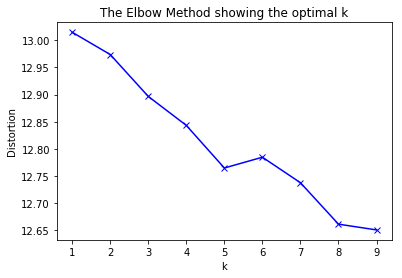

In [136]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X4)
    kmeanModel.fit(X4)
    distortions.append(sum(np.min(cdist(X4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X4.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()